In [ ]:
python healthcare_python.py


In [2]:
# For data manipulation
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (if needed)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [5]:
import pandas as pd




In [6]:
cats = ['column1', 'column2']  # replace with your actual categorical columns


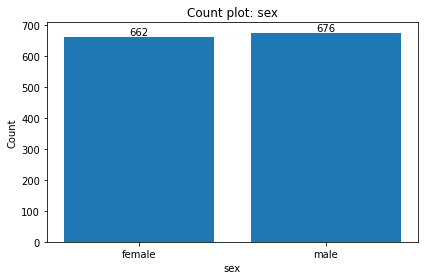

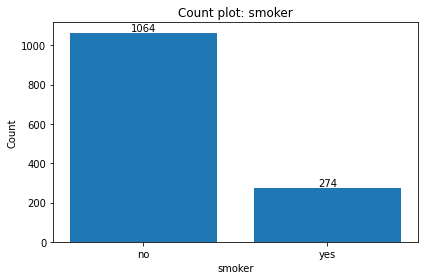

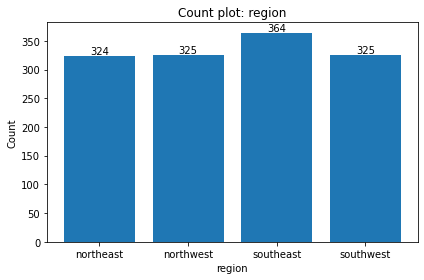

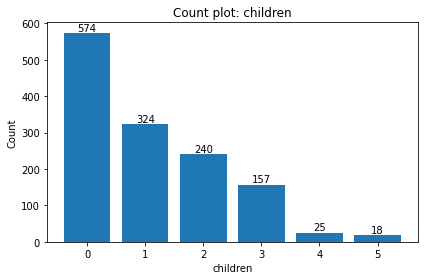

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load your dataset into a DataFrame
df = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with your file path

# Step 3: Define categorical columns
cats = ['sex', 'smoker', 'region', 'children']

# Step 4: Loop through each categorical column and plot counts
for col in cats:
    counts = df[col].value_counts().sort_index()       
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(counts.index.astype(str), counts.values)     
    ax.set_title(f'Count plot: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    for i, v in enumerate(counts.values):               
        ax.text(i, v + max(counts.values)*0.01, str(v), ha='center')
    plt.tight_layout()
    plt.show()


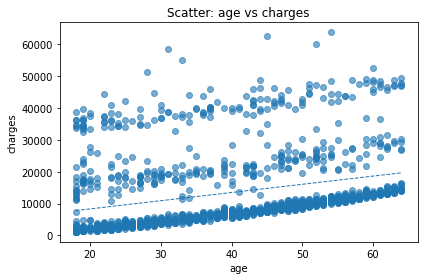

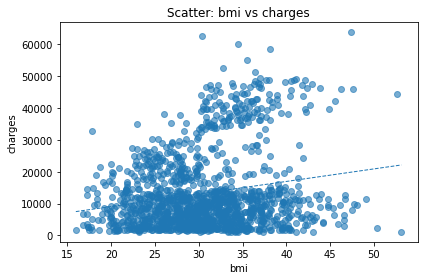

In [9]:
num_cols = ['age', 'bmi']

for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(df[col], df['charges'], alpha=0.6)
    ax.set_title(f'Scatter: {col} vs charges')
    ax.set_xlabel(col)
    ax.set_ylabel('charges')

    m, b = np.polyfit(df[col], df['charges'], 1)
    x_vals = np.linspace(df[col].min(), df[col].max(), 100)
    ax.plot(x_vals, m*x_vals + b, linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

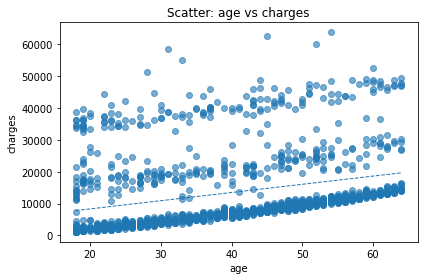

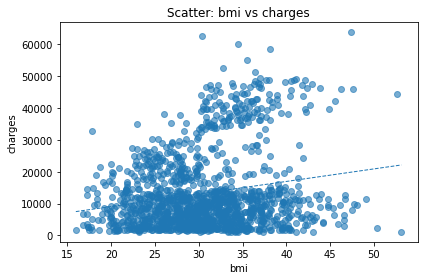

In [10]:
num_cols = ['age', 'bmi']

for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(df[col], df['charges'], alpha=0.6)     
    ax.set_title(f'Scatter: {col} vs charges')
    ax.set_xlabel(col)
    ax.set_ylabel('charges')

    m, b = np.polyfit(df[col], df['charges'], 1)       
    x_vals = np.linspace(df[col].min(), df[col].max(), 100)
    ax.plot(x_vals, m*x_vals + b, linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

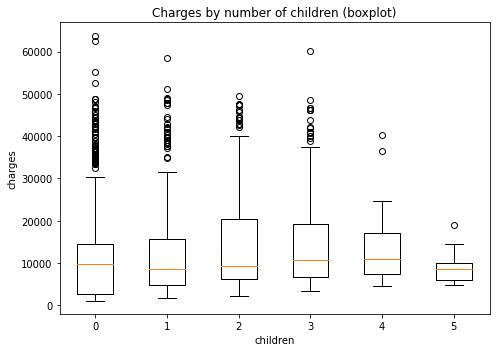

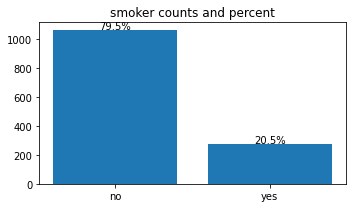

In [12]:
# Boxplot by children
groups = sorted(df['children'].unique())
data_by_children = [df.loc[df['children'] == g, 'charges'] for g in groups]

fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(data_by_children, labels=[str(g) for g in groups], showfliers=True)
ax.set_title('Charges by number of children (boxplot)')
ax.set_xlabel('children')
ax.set_ylabel('charges')
plt.tight_layout()
plt.show()

# Bar plot for smoker counts and percentage
col = 'smoker'
counts = df[col].value_counts()
pct = counts / counts.sum() * 100

fig, ax = plt.subplots(figsize=(5,3))
ax.bar(counts.index.astype(str), counts.values)
for i, (c, p) in enumerate(zip(counts.values, pct.values)):
    ax.text(i, c + 5, f'{p:.1f}%', ha='center')

ax.set_title(f'{col} counts and percent')
plt.tight_layout()
plt.show()


In [13]:
num_cols = ['age','bmi','children','charges']
print("Numeric columns present:", [c for c in num_cols if c in df.columns])

print(df[num_cols].isnull().sum())

Numeric columns present: ['age', 'bmi', 'children', 'charges']
age         0
bmi         0
children    0
charges     0
dtype: int64


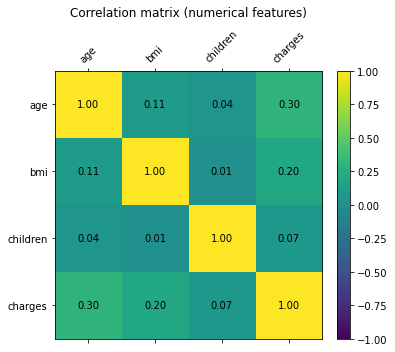

In [18]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load your dataset
df = pd.read_csv('insurance.csv')  # replace with your file path

# Step 3: Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Step 4: Compute correlation matrix
corr = df[num_cols].corr()  # <-- THIS creates 'corr'

# Step 5: Plot the correlation matrix
fig, ax = plt.subplots(figsize=(6,5))
cax = ax.matshow(corr, vmin=-1, vmax=1)

plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)

# Add the correlation values inside the squares
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=10)

ax.set_title("Correlation matrix (numerical features)", pad=12)
plt.colorbar(cax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


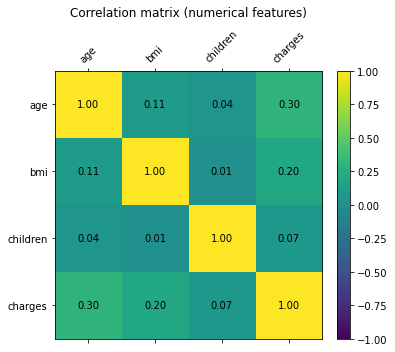

In [19]:
fig, ax = plt.subplots(figsize=(6,5))
cax = ax.matshow(corr, vmin=-1, vmax=1)    
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)

for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=10)
ax.set_title("Correlation matrix (numerical features)", pad=12)
plt.colorbar(cax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

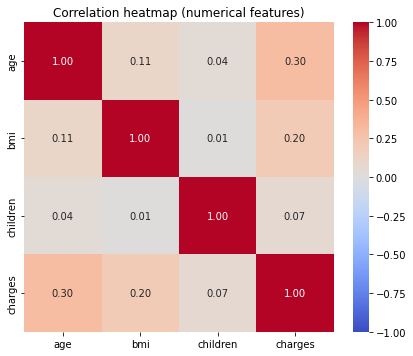

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation heatmap (numerical features)')
plt.tight_layout()
plt.show()


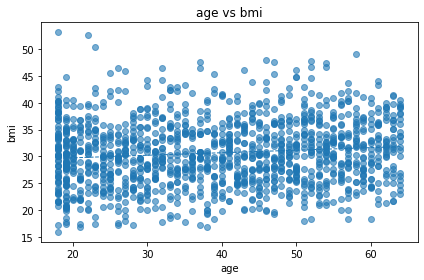

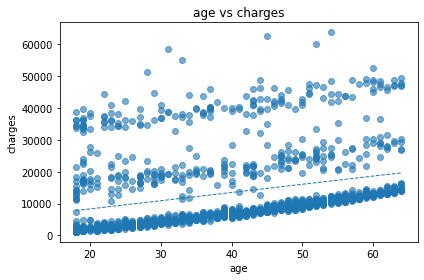

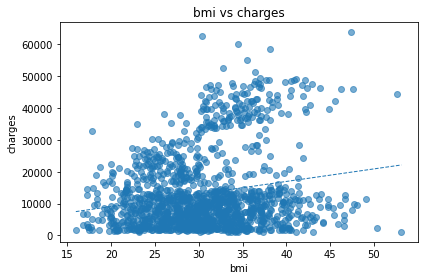

In [21]:
pairs = [('age','bmi'), ('age','charges'), ('bmi','charges')]

for x, y in pairs:
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(df[x], df[y], alpha=0.6)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
    # add linear trend line (least squares)
    m, b = np.polyfit(df[x], df[y], 1)
    xs = np.linspace(df[x].min(), df[x].max(), 100)
    ax.plot(xs, m*xs + b, linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()


In [22]:
smokers = df[df['smoker'] == 'yes']
nonsmokers = df[df['smoker'] == 'no']

In [23]:

print("Total rows:", len(df))
print("Smokers:", len(smokers))
print("Non-smokers:", len(nonsmokers))


Total rows: 1338
Smokers: 274
Non-smokers: 1064


In [24]:
print("\nSmokers sample:")
display(smokers.head())
print("\nNon-smokers sample:")
display(nonsmokers.head())


Smokers sample:


,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,female,27.90,0,yes,southwest,16884.9240,15-19
11,62,female,26.29,0,yes,southeast,27808.7251,60-64
14,27,male,42.13,0,yes,southeast,39611.7577,25-29
19,30,male,35.30,0,yes,southwest,36837.4670,25-29
23,34,female,31.92,1,yes,northeast,37701.8768,30-34



Non-smokers sample:


,age,sex,bmi,children,smoker,region,charges,age_bin
1,18,male,33.770,1,no,southeast,1725.55230,15-19
2,28,male,33.000,3,no,southeast,4449.46200,25-29
3,33,male,22.705,0,no,northwest,21984.47061,30-34
4,32,male,28.880,0,no,northwest,3866.85520,30-34
5,31,female,25.740,0,no,southeast,3756.62160,30-34


In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance.csv')  # replace with your file path


In [29]:
df['age_bin'] = pd.cut(df['age'], bins=range(0, 101, 10))  # 0-10, 10-20, ..., 90-100


In [30]:
# Pivot: mean charges by age_bin and smoker status
pivot = df.pivot_table(
    index='age_bin',
    columns='smoker',   # 'yes' or 'no'
    values='charges',
    aggfunc='mean'
).reset_index()


In [32]:
pivot_plot = pivot.copy()
pivot_plot['mean_charges_no'] = pivot_plot.get('no', np.nan)
pivot_plot['mean_charges_yes'] = pivot_plot.get('yes', np.nan)

x_labels = [str(interval) for interval in pivot_plot['age_bin']]


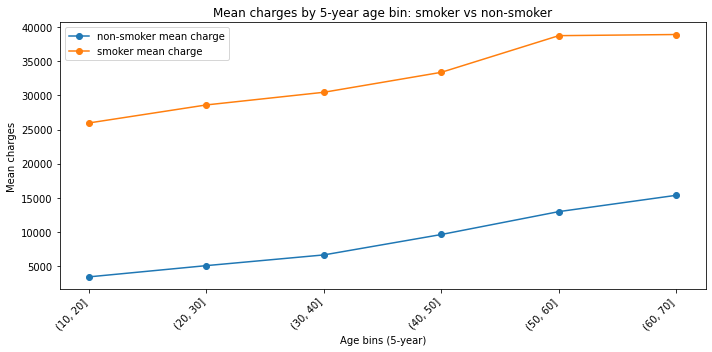

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(pivot_plot))
ax.plot(x, pivot_plot['mean_charges_no'], marker='o', label='non-smoker mean charge')
ax.plot(x, pivot_plot['mean_charges_yes'], marker='o', label='smoker mean charge')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel('Age bins (5-year)')
ax.set_ylabel('Mean charges')
ax.set_title('Mean charges by 5-year age bin: smoker vs non-smoker')
ax.legend()
plt.tight_layout()

plt.show()